# Investigate a DataSet: TMDB DataSet

#### Introduction

##### Dataset Description

###### id: Movie ID number
###### imdb_id: Movie ID on IMDB database
###### popularity: Popularity score of movie
###### budget: Total movie budget
###### revenue: Total movie revenue
###### original_title: Original Movie title
###### cast: Movie casts
###### homepage: Movie url address
###### director: Movie director
###### tagline: Movie Tagline
###### keywords: Keyword describing the movie
###### overview: Movie synopsis
###### runtime: Movie duration
###### genre: Movie Genre
###### production_companies: Production companies
###### release_date: Movie release date
###### vote_count: Count of votes
###### vote_average: Average vote counts
###### release_year: Year of movie release
###### budget_adj: Adjusted budget for inflation
###### revenue)adj: Adjusted revenue for inflation

In [37]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Data Wrangling

##### General Properties

In [38]:
# import dataset with pandas
df = pd.read_csv('tmdb_dataset.csv')
# check dataset info
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-15,5562,6.5,2015,137999939.3,1.392446e+09


In [39]:
# check shape of dataset prior to cleaning
df.shape

(10866, 21)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### Data Cleaning

In [41]:
 # check for duplicated IDs
sum(df['id'].duplicated())

1

In [42]:
# remove row with duplicated ID
df.drop_duplicates(subset=['id'], inplace=True)
df.shape

(10865, 21)

In [43]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [44]:
# drop columns with lots of null values & columns not important to the analysis
df.drop(columns=['production_companies', 'keywords', 'tagline', 'director', 'homepage', 'cast', 'imdb_id', 'overview'], inplace=True)
df.shape

(10865, 13)

In [45]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [46]:
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,06-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08


In [47]:
# split genres column by | as delimeter
df[['genre1', 'genre2', 'genre3', 'genre4', 'genre5']]= df['genres'].str.split("|", expand=True)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,06-09-15,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,04-01-15,2947,7.3,2015,174799923.1,1.385749e+09,Action,Crime,Thriller,None,None


In [48]:
# drop initial genres column
df.drop(columns = ['genres'], inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,32.985763,150000000,1513528810,Jurassic World,124,06-09-15,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000,1506249360,Furious 7,137,04-01-15,2947,7.3,2015,174799923.1,1.385749e+09,Action,Crime,Thriller,None,None


In [49]:
df.isnull().sum()

id                    0
popularity            0
budget                0
revenue               0
original_title        0
runtime               0
release_date          0
vote_count            0
vote_average          0
release_year          0
budget_adj            0
revenue_adj           0
genre1               23
genre2             2351
genre3             5787
genre4             8885
genre5            10324
dtype: int64

In [50]:
# drop genre2, genre3, genre4 and genre5; keeping only genre1 for our analysis

df.drop(columns=['genre2', 'genre3', 'genre4', 'genre5'], inplace= True)

In [51]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
genre1            0
dtype: int64

In [52]:
# all datatypes seem 0okay at this point; however, I will like to drop the release_date as well
df.drop(columns=['release_date'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   budget          10842 non-null  int64  
 3   revenue         10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   vote_count      10842 non-null  int64  
 7   vote_average    10842 non-null  float64
 8   release_year    10842 non-null  int64  
 9   budget_adj      10842 non-null  float64
 10  revenue_adj     10842 non-null  float64
 11  genre1          10842 non-null  object 
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


In [53]:
df.head(10)

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09,Action
5,281957,9.110700,135000000,532950503,The Revenant,156,3929,7.2,2015,1.241999e+08,4.903142e+08,Western
6,87101,8.654359,155000000,440603537,Terminator Genisys,125,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction
7,286217,7.667400,108000000,595380321,The Martian,141,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama
8,211672,7.404165,74000000,1156730962,Minions,91,2893,6.5,2015,6.807997e+07,1.064192e+09,Family
9,150540,6.326804,175000000,853708609,Inside Out,94,3935,8.0,2015,1.609999e+08,7.854116e+08,Comedy


In [54]:
# create a new column to show budget classifications (high budget, low budget)

# First find the average budget
average_budget = df['budget_adj'].mean()
average_budget

17587121.438276574

In [55]:


#labels for the two budget classes
bin_names = ['Low Budget', 'High Budget']

# specify the edge
df['budget_adj'].min()
df['budget_adj'].mean()
df['budget_adj'].max()

edges = [0, 17587121.43, 425000000.0]

# 
df['Budget_Class'] = pd.cut(df['budget_adj'], edges, labels=bin_names)
df.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,Budget_Class
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,137999939.3,1.392446e+09,Action,High Budget
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,137999939.3,3.481613e+08,Action,High Budget
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,High Budget
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,183999919.0,1.902723e+09,Action,High Budget
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,174799923.1,1.385749e+09,Action,High Budget


#### Exploratory Data Analysis

##### Q1: How has average budget per movie changed over the years?


###### Have Producers been spending more money making movies as the years progressed?

In [56]:
# Grouping by release year, find the total budget
total_budget_per_year = df.groupby('release_year')['budget_adj'].sum()

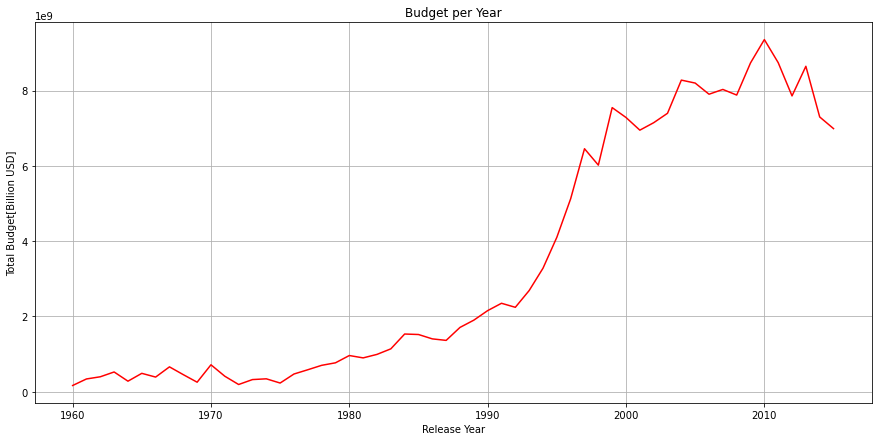

In [57]:
# Plotting a line chart showing the trend
total_budget_per_year.plot(kind='line',
    figsize = (15, 7),
    xlabel = 'Release Year',
    ylabel = 'Total Budget[Billion USD]',
    title= 'Budget per Year',
    grid=True,
    color = 'red',
);

In [58]:
# Lets see how much movies are made per year
number_of_movies_per_year = df.groupby('release_year')['id'].count()



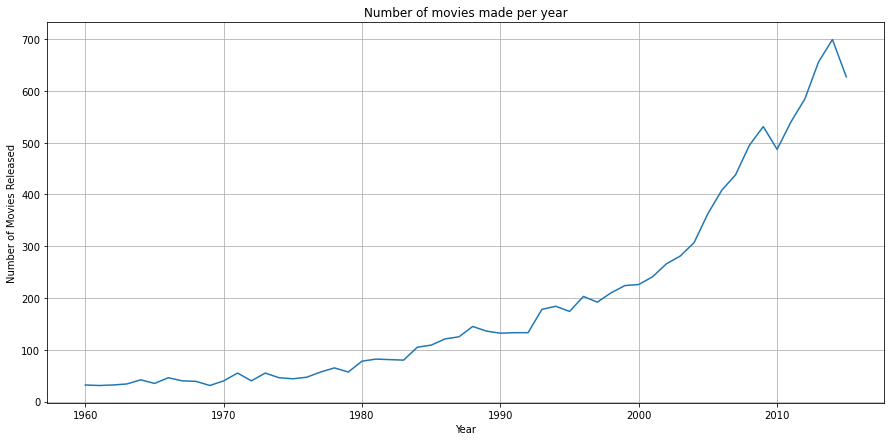

In [59]:
# Plotting the trend for amount of movies made using Matplotlib
plt.figure(figsize =(15,7))
plt.plot(number_of_movies_per_year)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of movies made per year')
plt.grid(True)
plt.show()

###### Total Budget has increased by almost more than 6 times since 1960. But likewise, total mumber of movies made have also increased by about 6 times as well since 1960.

###### The aim now is to find the average budget per movie.

In [60]:
# Create a dictionary of the two series (total budget and number of movies)
dict = {'Total budget': total_budget_per_year, 'number of Movies': number_of_movies_per_year}

In [61]:
# Convert dictionary into a dataframe
df_budget_per_movie = pd.DataFrame(dict)
# check type
type(df_budget_per_movie)

pandas.core.frame.DataFrame

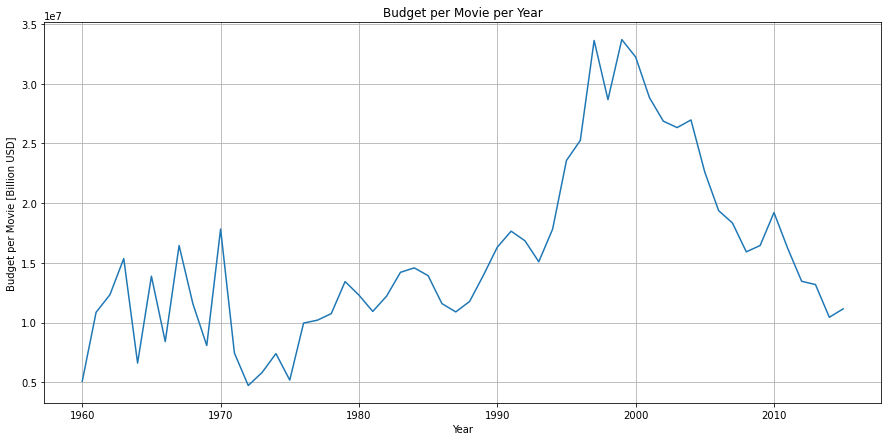

In [62]:
# Create a column for Budget per movie in dataframe
df_budget_per_movie['budget per movie'] = df_budget_per_movie['Total budget']/df_budget_per_movie['number of Movies']
# Plot a trend for Budget per movie
plt.figure(figsize=(15,7))
plt.plot(df_budget_per_movie['budget per movie'])
plt.xlabel('Year')
plt.ylabel('Budget per Movie [Billion USD]')
plt.title('Budget per Movie per Year')
plt.grid(True)
plt.show()

###### Average budget per movie increased up until around 1997 - 1999; after that period, average budget per movie has declined.

In [63]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,Budget_Class
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,137999939.3,1.392446e+09,Action,High Budget
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,137999939.3,3.481613e+08,Action,High Budget
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,High Budget
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,183999919.0,1.902723e+09,Action,High Budget
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,174799923.1,1.385749e+09,Action,High Budget


##### Q2: How has average revenue changed over the years?

###### Have Producers been spending more money making movies as the years progressed?

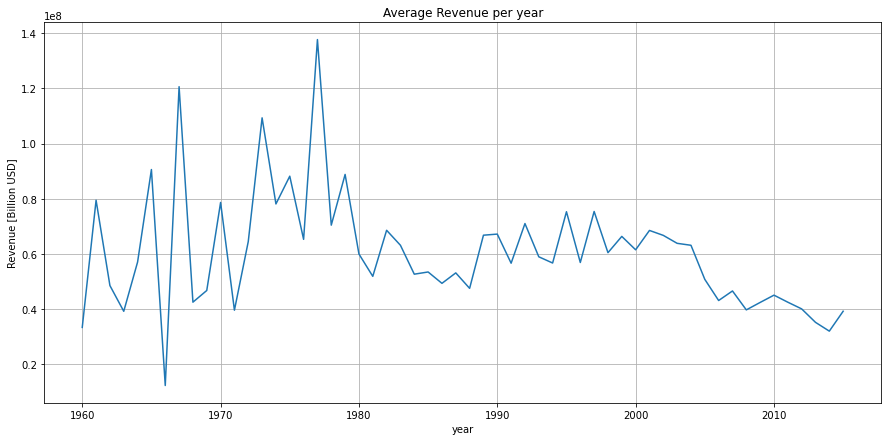

In [64]:
# Find average revenue, grouped by release year
total_revenue_per_year = df.groupby('release_year')['revenue_adj'].mean()
plt.figure(figsize=(15,7))
plt.plot(total_revenue_per_year)
plt.xlabel('year')
plt.ylabel('Revenue [Billion USD]')
plt.title('Average Revenue per year')
plt.grid(True)
plt.show()

###### Average Revenue has not show any particular trend. Apart from some spikes in the 70's and 80's, average revenue has pretty much stayed the same

###### However, since 2000, revenue has been on a decline from close to $800 million to $400 million in 2016.

##### Q3: What Factor have the most effect on a movie's vote count?


###### Here, I would like to see if there is any correlation between any of runtime, budget and revenue; and Vote count

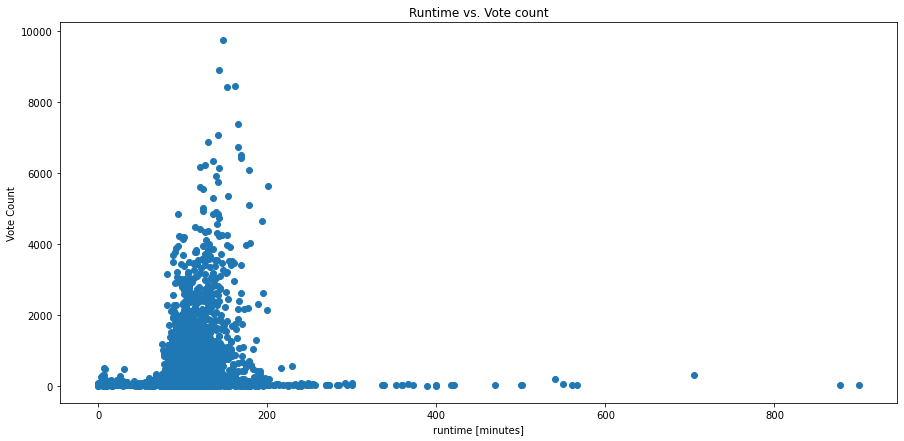

In [65]:
# Check correlation between runtime and Movie Popularity
plt.figure(figsize=(15,7))
plt.scatter(df['runtime'], df['vote_count'])
plt.xlabel('runtime [minutes]')
plt.ylabel('Vote Count')
plt.title('Runtime vs. Vote count')
plt.show()

In [66]:
df['runtime'].corr(df['vote_count'])

0.16318743117313272

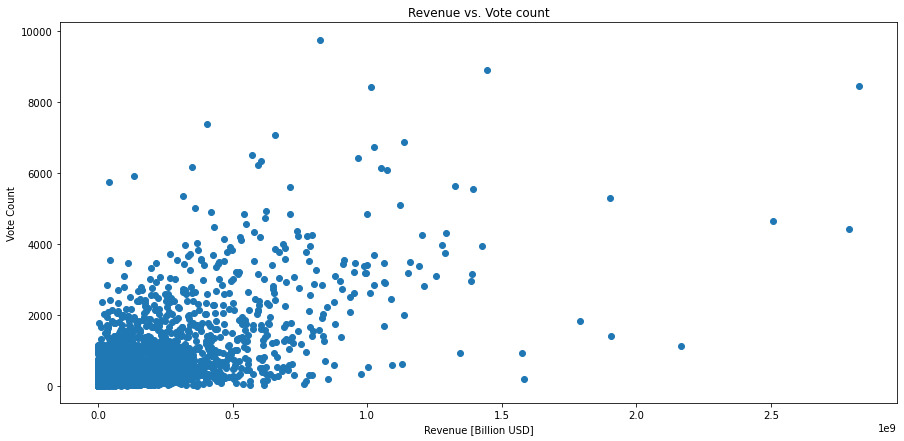

In [67]:
# Check correlation between revenue and Movie Popularity
plt.figure(figsize=(15,7))
plt.scatter(df['revenue_adj'], df['vote_count'])
plt.xlabel('Revenue [Billion USD]')
plt.ylabel('Vote Count')
plt.title('Revenue vs. Vote count')
plt.show()

In [68]:
df['revenue_adj'].corr(df['vote_count'])

0.7078645889892301

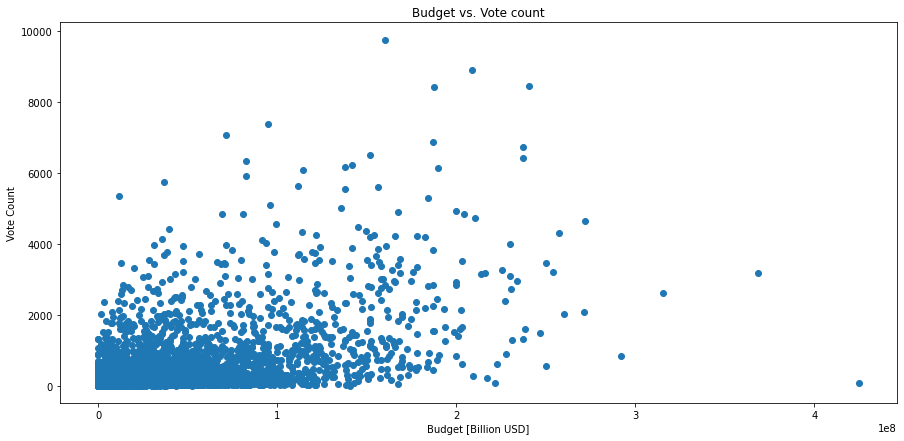

In [69]:
# Check correlation between Budget and Movie Popularity
plt.figure(figsize=(15,7))
plt.scatter(df['budget_adj'], df['vote_count'])
plt.xlabel('Budget [Billion USD]')
plt.ylabel('Vote Count')
plt.title('Budget vs. Vote count')
plt.show()

In [70]:
df['budget_adj'].corr(df['vote_count'])

0.5869232967643204

###### From the scatter plots, Budget and Revenue have a positive correlation with Vote counts. It would be safe to assume that high budget and grossing movies had a higher vote count.

###### I went further to check the correlation coefficient of each comparison. Revenue showed the most positive correlation with vote count (this should go without saying, right?), with a correlation coefficient of ~0.71. Budget showed a fairly strong coefficient of ~0.59. Runtime showed a very weak coefficient of ~0.16.

In [71]:
df['Budget_Class'].value_counts()

High Budget    2974
Low Budget     2194
Name: Budget_Class, dtype: int64

##### Q4: What are the top 5 grossing Genre of since 1960?


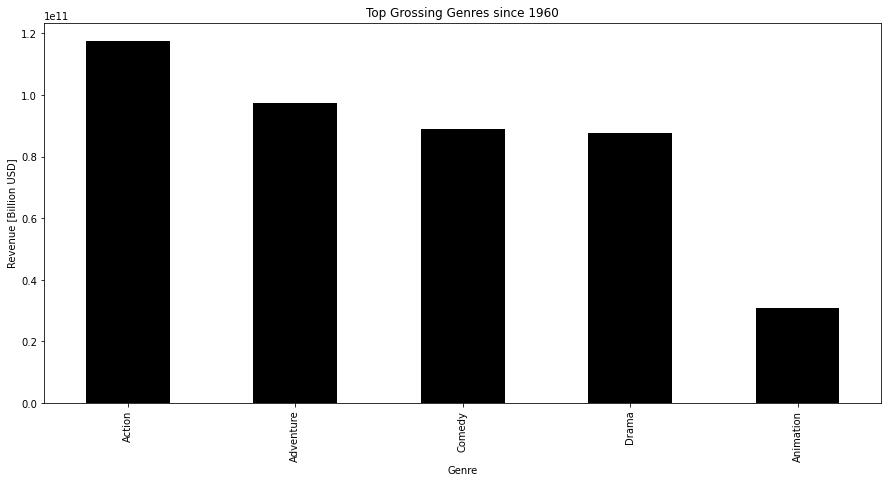

In [72]:
Top_Grossing = df['revenue_adj'].groupby(by=df['genre1']).sum().sort_values(ascending=False)[:5].plot(kind='bar',
    xlabel='Genre',
    ylabel='Revenue [Billion USD]',
    figsize=(15, 7),
    title='Top Grossing Genres since 1960',
    color='black',
)
Top_Grossing;

###### Since 1960, The action genre has been the most grossing genre, reaching close to 1.2 billion USD.

#### Conclusion


###### I performed an exploratory data analysis on the TMDB dataset. The dataset contains information about movies, their revenue, budget, popularity, cast, etc.
###### The EDA seeks to generate 4 Key insights about the dataset.

###### **INSIGHT 1**: _Average budget per movie increased up until around 1997 - 1999; after that period, average budget per movie has declined._

###### **INSIGHT 2**: _Average Revenue has not show any particular trend. Apart from some spikes in the 70's and 80's, average revenue has pretty much stayed the same. However, since 2000, revenue has been on a decline from close to $800 million to $400 million in 2016._

###### **INSIGHT 3**: _From the scatter plots, Budget and Revenue have a positive correlation with Vote counts. It would be safe to assume that high budget and grossing movies had a higher vote count. I went further to check the correlation coefficient of each comparison. Revenue showed the most positive correlation with vote count (this should go without saying, right?), with a correlation coefficient of ~0.71. Budget showed a fairly strong coefficient of ~0.59. Runtime showed a very weak coefficient of ~0.16._

###### **INSIGHT 4**: _Since 1960, The action genre has been the most grossing genre, reaching close to 1.2 billion USD._


##### Limitatation
###### The dataset contained a lot of missing values that did not allow for more detailed analysis to be done due to the dropping of the affected rows and columns

